In [1]:
# Import necessary libraries and modules
%matplotlib widget
import numpy as np
import scipy.constants as scp
import math
import matplotlib.pyplot as plt
import Photon_Class as P  # Photon_Class contains the definition of the Photon class
import Sim_data as data # Sim_data contains definiations for QE and abs data
import random
import csv
import MonteCarlo_V2 as MC  # MonteCarlo_V2 contains the definition of the start_sim function
from random import seed
import ast


# ------------------------------------- Inputs and Simulation Setup: -----------------------------------------

# SIMULATION CONSTANTS
nruns = 4000

thicknesses = np.arange(5,26,5) #mm
sizes = np.arange(15,61,5) #cm
size = 60
thickness = 10

water = False


# WLS PLATE CONSTANTS
n_wls = 1.58  # Refractive index of WLS plate
n_water = 1.33  # Refractive index of water
ca = math.asin(n_water/n_wls)  # Critical angle between WLS and water

satls = np.arange(2*1e-3,30*1e-3,5*1e-3) #m
latls = np.arange(2,5,0.5) #m
satl = 10*1e-3  # Short attenuation length
latl = 3.5  # Long attenuation length


# PMT CONSTANTS
rx, ry, rz = 0.0762/2, 40e-3, 0.0762/2  # PMT radii
thetaPMT = np.linspace(0, 2*np.pi, 100)
pmt_radii = np.array([rx, ry, rz])

# PHOTON CONSTANTS
v_mag = scp.c * n_wls  # Velocity magnitude


# Create a header list for the output CSV file
header_list = ['Run', 'Initial_wl_nm', 'Short_absorption_length_m', 'Long_absorption_length_m','Absorption_coordinate_m', 
               'Isotropic_emmission_angle_theta_deg', 'Isotropic_emmission_angle_phi_deg', 'Shifted_wl_nm',
               'Refraction_coordinate_m', 'Hit_coordinate_m', 'Detected',
               'Num_reflections', 'Quantumn_efficiency', 'X_positions_m', 
               'Y_positions_m', 'Z_positions_m', 'Time_s', 'Timed_out', 'Total_distance_m']


for s in sizes:
#for sa in satls:

    for th in thicknesses:
    #for la in latls:

        seed(1) # same random seed for each run

        #w, h, l = size*1e-2, thickness*1e-3, size*1e-2  # Dimensions for WLS plate
        w, h, l = s*1e-2, th*1e-3, s*1e-2  # Dimensions for WLS plate
        wls_boundaries = np.array([[0, w], [0, h], [0, l]])  # Boundaries
        cx, cy, cz = w/2, 0, l/2  # PMT center positions
        pmt_center = np.array([cx, cy, cz])

            
        path = 'outputs/thicknesses/seed(1)/' + str(th) + 'mm_' + str(s) + 'cm_'
        #out_file = path + 'sim_output_' + str(sa) + '_m' + str(la) + '_m.txt'
        out_file = path + 'sim_output_' + str(satl) + '_m' + str(latl) + '_m.txt'

        # ------------------------------------------- Begin Simulation: -----------------------------------------------


        # Open the output file and write the header
        with open(out_file, 'w', newline='') as file:
            writer = csv.writer(file,  delimiter=';')
            writer.writerow(header_list)

            # Run the simulation for each run
            for n in range(nruns):
                # print("- LOG -")
                # print("Size:", s, "Thickness: ", th, "Run:", n)

                # Refresh these variables every run
                x, y, z = random.uniform(0,w/2 - rx), h-(1e-4), random.uniform(0,l/2 - rz)  # x, y, and z origin positions
                orig_pos = np.array([x, y, z])  # Position vector
                theta, phi = random.uniform((3/2 * math.pi) - ca, (3/2 * math.pi) + ca), random.uniform(0,math.pi) # Angle of refraction into the WLS plate, max at ca
                vx, vy, vz = v_mag * math.sin(theta) * math.cos(phi), v_mag * math.sin(theta) * math.sin(phi), v_mag * math.cos(theta)  # Velocity origin directions 
                velocity = np.array([vx, vy, vz])  # Velocity vector
                init_wl = 380  # Cherenkov wavelength (nm)

                # Run the simulation using the start_sim function from MonteCarlo_V2
                (sabsl, labsl, abs_coords, theta_iso, phi_iso, shwl, refract_coords, hit_coords, detected, 
                reflects, pmtqe, xpos, ypos, zpos, t, timeout, total_dist) = MC.start_sim(orig_pos, velocity, init_wl, satl, latl, 
                                                                            wls_boundaries, pmt_center, pmt_radii, ca, water)

                # Write the results of the simulation to the CSV file
                writer.writerow([n, init_wl , sabsl, labsl , abs_coords, theta_iso, phi_iso, shwl, refract_coords, 
                                hit_coords, detected, reflects, pmtqe, xpos, ypos, zpos, t, timeout, total_dist])


Hit Efficiency:  23.316666666666666 %
Quantum Efficiency:  22.015725518227306 %
Total detection Efficiency:  5.133333333333334 %

Successful hits: [4, 6, 18, 22, 40, 42, 45, 47, 53, 61, 65, 79, 90, 96, 101, 102, 111, 114, 126, 130, 131, 132, 134, 139, 140, 147, 153, 158, 165, 172, 175, 195, 196, 197, 201, 203, 207, 212, 214, 216, 224, 230, 233, 241, 254, 256, 259, 262, 264, 266, 268, 272, 274, 275, 284, 288, 289, 290, 297, 313, 314, 319, 320, 324, 330, 347, 348, 361, 362, 367, 368, 380, 386, 387, 388, 389, 392, 400, 403, 409, 414, 419, 423, 427, 444, 447, 449, 451, 452, 453, 456, 460, 466, 478, 481, 482, 487, 494, 504, 512, 517, 522, 527, 536, 537, 540, 543, 546, 548, 550, 553, 558, 560, 561, 565, 566, 567, 571, 573, 576, 586, 588, 594, 596, 599, 604, 605, 612, 634, 635, 639, 651, 656, 658, 670, 672, 675, 678, 680, 681, 685, 687, 688, 690, 691, 692, 697, 702, 705, 706, 707, 715, 716, 717, 719, 720, 722, 733, 734, 738, 739, 741, 744, 748, 752, 754, 762, 765, 766, 768, 771, 775, 777, 779

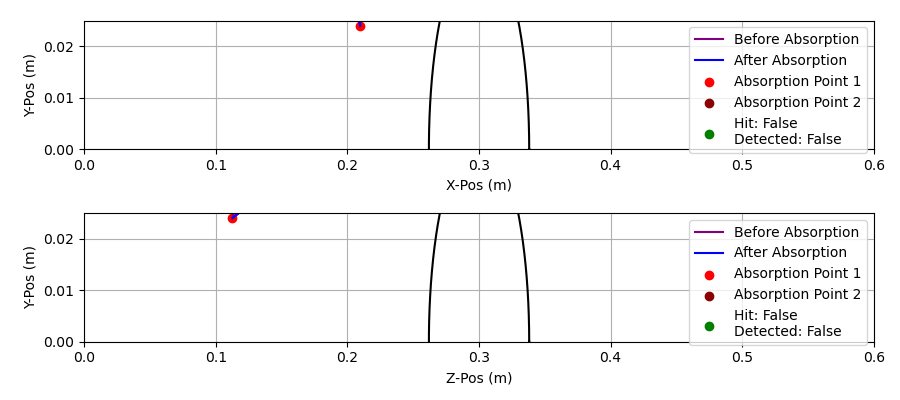

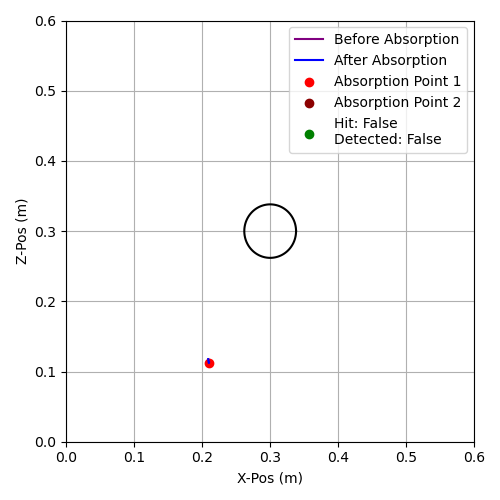

In [20]:
# Reading simulation data file

thickness = 25
size = 60
satl = 0.01
latl = 3.5

w,h,l =  size*1e-2, thickness*1e-3, size*1e-2 
cx, cy, cz = w/2, 0, l/2  # PMT center positions

# path = 'outputs/'
# out_file = path + 'sim_output_' + str(th) + 'mm_' + str(s) + 'cm' + '.txt'
path = 'outputs/thicknesses/seed(1)/' + str(thickness) + 'mm_' + str(size) + 'cm_'
#out_file = path + 'sim_output_' + str(sa) + '_m' + str(la) + '_m.txt'
out_file = path + 'sim_output_' + str(satl) + '_m' + str(latl) + '_m.txt'

out_data = np.genfromtxt(out_file, names=True, delimiter=';', dtype=None, encoding=None) #read data

# obtaining variables from outout data
detections = np.where(out_data['Detected'] == True)[0]
hits = np.where(out_data['Hit_coordinate_m'] != '[]')[0]

#filter the shifted wls to only include those that were absorbed, as if photon wasnt absorbed then remains as inital wl;
det_shift_wls = [wl for wl, absorption in zip(out_data[detections]['Shifted_wl_nm'], out_data[detections]['Absorption_coordinate_m']) if absorption != '[]']
all_shift_wls = [wl for wl, absorption in zip(out_data['Shifted_wl_nm'], out_data['Absorption_coordinate_m']) if absorption != '[]']
det_init_wls = out_data[detections]['Initial_wl_nm']
all_init_wls = out_data['Initial_wl_nm']
wls = out_data['Shifted_wl_nm']
det_sabsls = out_data[detections]['Short_absorption_length_m']
det_labsls = out_data[detections]['Long_absorption_length_m']
all_sabsls = out_data['Short_absorption_length_m']
all_labsls = out_data['Long_absorption_length_m']
det_refs = out_data[detections]['Num_reflections']
all_refs = out_data['Num_reflections']
det_times = out_data[detections]['Time_s']
all_times = out_data['Time_s']
time_outs = out_data['Timed_out']
Qeffa = out_data['Quantumn_efficiency'].astype(float)


Run = 50

hit = len(out_data[Run]["Hit_coordinate_m"]) > 2
hit_coord = np.asarray(out_data[Run]['Hit_coordinate_m'][1:-1].split(','))
det = out_data[Run]["Detected"]
xpos = np.asarray(out_data[Run]['X_positions_m'][1:-1].split(',')).astype(float)
ypos = np.asarray(out_data[Run]['Y_positions_m'][1:-1].split(',')).astype(float)
zpos = np.asarray(out_data[Run]['Z_positions_m'][1:-1].split(',')).astype(float)
sabs_len = out_data[Run]['Short_absorption_length_m']
labs_len = out_data[Run]['Long_absorption_length_m']
abs_coord_ = eval(out_data[Run]['Absorption_coordinate_m'])
abs_coord = np.array(abs_coord_, dtype=float)
refract_coord = np.asarray(out_data[Run]['Refraction_coordinate_m'][2:-2].split(','))


if len(abs_coord) >= 1:
    absi_1 = np.where((xpos == abs_coord[0][0]) & (ypos == abs_coord[0][1]) & (zpos == abs_coord[0][2]))[0][0]
else:
    absi_1 = -1
    abs_coord = [[None, None, None]]
if len(abs_coord) >= 2:
    absi_2 = np.where((xpos == abs_coord[1][0]) & (ypos == abs_coord[1][1]) & (zpos == abs_coord[1][2]))[0][0]
else:
    absi_2 = -1
    abs_coord = np.append(abs_coord, [[None,None,None]], 0)

if np.any(hit_coord != ''):
    hit_coord = hit_coord.astype(float)
else:
    hit_coord = [None, None, None]


    
print("Hit Efficiency: ", len(hits)/nruns * 100, "%")
print("Quantum Efficiency: ", len(detections)/len(hits) * 100, "%")
print("Total detection Efficiency: ", len(detections)/nruns * 100, "%")
print(f"\nSuccessful hits: {hits.tolist()}")
print("\nShort Absorption Length:", sabs_len)
print("Long Absorption Length:", labs_len)
print("Isotropic re-emmission angles:", out_data[Run]['Isotropic_emmission_angle_theta_deg'], out_data[Run]['Isotropic_emmission_angle_phi_deg'])
print("Total Time:",out_data[Run]['Time_s'] )
print("Total Dist:",out_data[Run]['Total_distance_m'] )
print("Point(s) of absorption:", abs_coord)


print("\nPercent of refractions:", len(np.where(np.asarray(out_data['Refraction_coordinate_m']) != '[]')[0]) / nruns * 100, "%")
abs_coord_str_list = out_data['Absorption_coordinate_m']
abs_coord_list = [ast.literal_eval(coord_str) for coord_str in abs_coord_str_list]
indices_length_2 = [i for i, sublist in enumerate(abs_coord_list) if len(sublist) == 2]
print("Percent or re-absorptions (Long atl): ", len(indices_length_2)/nruns * 100, "%")
print("Time-Out Percent: ", (len(np.where(time_outs == True)[0]))/nruns * 100, "%")
#print(((len(indices_length_2) ) + (len(np.where(time_outs == True)[0]) ) + (len(np.where(out_data['Refraction_coordinate_m'] != '[]')[0])) + (len(hits))))
print(f'\nRUN: ', Run)
print("Refracted?:", out_data[Run]['Refraction_coordinate_m'])
print(out_file)

#-----------------------------------------------------------------------

# Plotting/Displaying Simulation Output
        
absx_1, absy_1, absz_1 = xpos[absi_1:], ypos[absi_1:], zpos[absi_1:] #first absoprtion 

def projection(ax,x,y,i1,i2,limx,limy,c1,c2,r1,r2,abs1,abs2,xlabel,ylabel):
    ax.plot(x, y, color="purple")
    ax.plot(abs1, abs2, color="blue")
    ax.scatter(abs_coord[0][i1], abs_coord[0][i2], color='red')  # Plot first absorption point
    ax.scatter(abs_coord[1][i1], abs_coord[1][i2], color='darkred')  # Plot second absorption point
    ax.scatter(hit_coord[i1], hit_coord[i2], color='green')  # Plot hit point
    ax.plot(c1+r1*np.cos(thetaPMT), c2+r2*np.sin(thetaPMT), color='black')
    ax.set_ylim(0, limy)
    ax.set_xlim(0, limx)
    #ax.axhline(y=0.05, xmin = 0, xmax = s)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid()
    ax.legend(["Before Absorption","After Absorption", "Absorption Point 1" , "Absorption Point 2",  "Hit: " + str(hit) +  "\nDetected: " + str(det)],loc='upper right')

fig, ax = plt.subplots(2, 1, layout="tight", figsize=(9, 4))
#X-Y Projection
projection(ax[0],xpos,ypos,0,1,w,h,cx,cy,rx,ry,absx_1,absy_1,"X-Pos (m)", "Y-Pos (m)")
#Z-Y Projection
projection(ax[1],zpos,ypos,2,1,l,h,cz,cy,rz,ry,absz_1,absy_1,"Z-Pos (m)", "Y-Pos (m)")
plt.show()
fig, ax = plt.subplots(1, 1, layout="tight", figsize=(5, 5))
#X-Z Projection
projection(ax,xpos,zpos,0,2,w,l,cx,cz,rx,rz,absx_1,absz_1,"X-Pos (m)", "Z-Pos (m)")
plt.show()
  



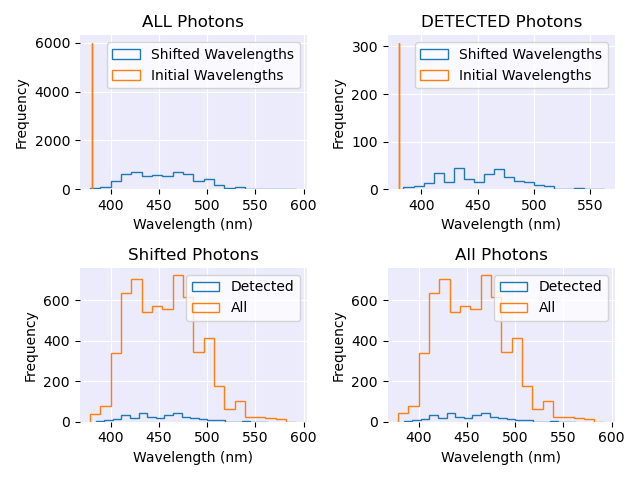

In [3]:
# Analysing Simulation Output

def plot_setup(ax):
    ax.legend(loc = "upper right")
    ax.grid(color = 'white')
    ax.set_facecolor("lavender")
    ax.patch.set_alpha(0.8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)



fig, ax = plt.subplots(2, 2)

ax[0,0].set_title("ALL Photons")
ax[0,0].hist(all_shift_wls, histtype = "step", bins=20, label = "Shifted Wavelengths")
ax[0,0].hist(all_init_wls, histtype = "step", bins=20, label = "Initial Wavelengths")
ax[0,0].set_xlabel("Wavelength (nm)")
ax[0,0].set_ylabel("Frequency")
plot_setup(ax[0,0])


ax[0,1].set_title("DETECTED Photons")
ax[0,1].hist(det_shift_wls, histtype = "step", bins=20, label = "Shifted Wavelengths")
ax[0,1].hist(det_init_wls, histtype = "step", bins=20, label = "Initial Wavelengths")
ax[0,1].set_xlabel("Wavelength (nm)")
ax[0,1].set_ylabel("Frequency")
plot_setup(ax[0,1])


ax[1,0].set_title("Shifted Photons")
ax[1,0].hist(det_shift_wls, histtype = "step", bins=20, label = "Detected")
ax[1,0].hist(all_shift_wls, histtype = "step", bins=20, label = "All")
ax[1,0].set_xlabel("Wavelength (nm)")
ax[1,0].set_ylabel("Frequency")
plot_setup(ax[1,0])


ax[1,1].set_title("All Photons")
ax[1,1].hist(wls[detections], histtype = "step", bins=20, label = "Detected")
ax[1,1].hist(wls, histtype = "step", bins=20, label = "All")
ax[1,1].set_xlabel("Wavelength (nm)")
ax[1,1].set_ylabel("Frequency")
plot_setup(ax[1,1])

plt.tight_layout()
plt.show()

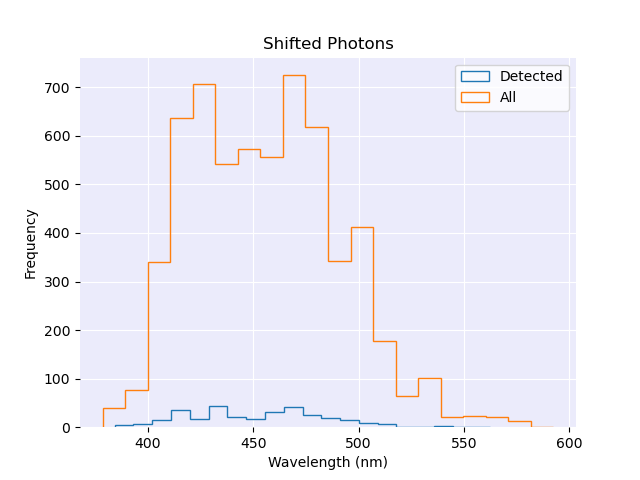

In [4]:
fig, ax = plt.subplots()
plt.title("Shifted Photons")
ax.hist(det_shift_wls, histtype = "step", bins=20, label = "Detected")
ax.hist(all_shift_wls, histtype = "step", bins=20, label = "All")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Frequency")
plot_setup(ax)

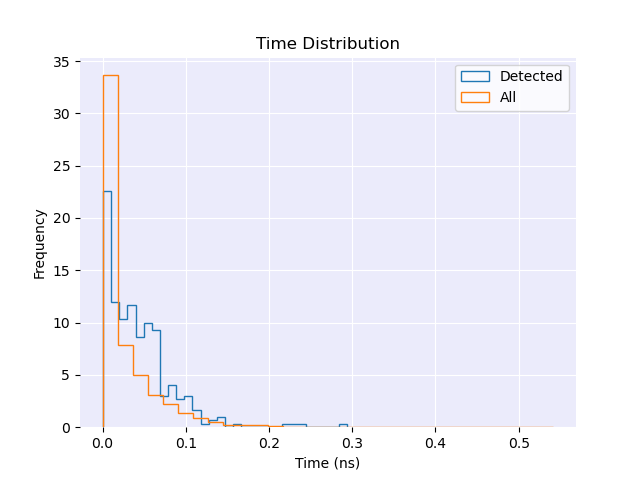

In [5]:

fig, ax = plt.subplots()
plt.title("Time Distribution")
ax.hist(det_times*1e7, bins = 30, histtype = "step", label="Detected", density = True)
ax.hist(all_times*1e7, bins = 30, histtype = "step", label="All", density = True)
plt.xlabel("Time (ns)")
plt.ylabel("Frequency")
plot_setup(ax)
plt.show()

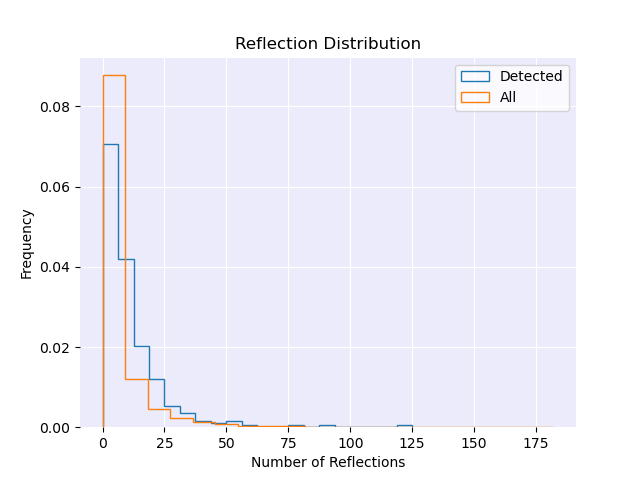

In [6]:
fig, ax = plt.subplots()
plt.title("Reflection Distribution")
ax.hist(det_refs, bins = 20, histtype = "step", label='Detected', density = True)
ax.hist(all_refs, bins = 20, histtype = "step", label='All', density = True)
plt.xlabel("Number of Reflections")
plt.ylabel("Frequency")
plot_setup(ax)

plt.show()

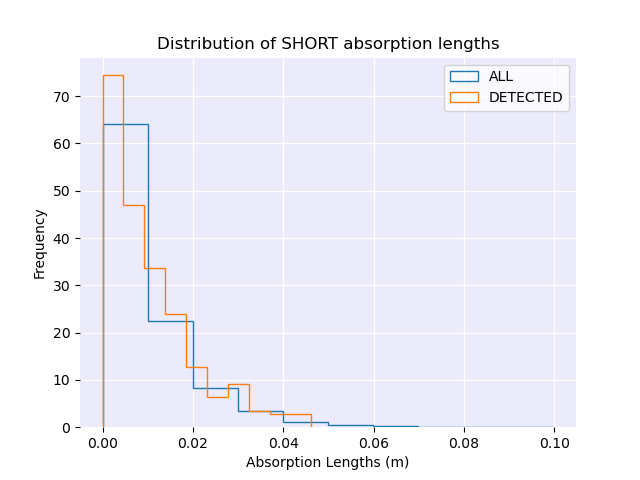

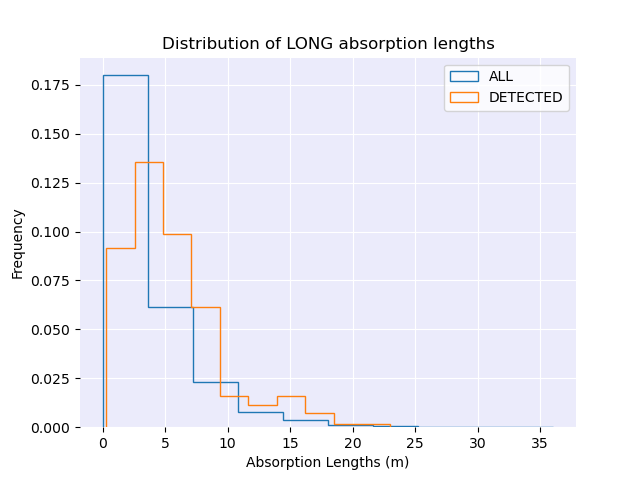

In [7]:

fig, ax = plt.subplots()
plt.title("Distribution of SHORT absorption lengths")
ax.hist(all_sabsls, histtype = "step", label = 'ALL', density = True)
ax.hist(det_sabsls, histtype = "step", label = 'DETECTED', density = True)
plt.xlabel("Absorption Lengths (m)")
plt.ylabel("Frequency")
plot_setup(ax)
plt.show()

fig, ax = plt.subplots()
plt.title("Distribution of LONG absorption lengths")
ax.hist(all_labsls, histtype = "step", label = 'ALL', density = True)
ax.hist(det_labsls, histtype = "step", label = 'DETECTED', density = True)
plt.xlabel("Absorption Lengths (m)")
plt.ylabel("Frequency")
plot_setup(ax)
plt.show()